In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

media = [
    'NachDenkSeiten', 
    'taz', 
    'DER SPIEGEL', 
    'ARD', 
    'ZDF', 
    'Bayerischer Rundfunk', 
    'ntv Nachrichten', 
    'faz', 
    'WELT', 
    'BILD', 
    'COMPACTTV'
    ]
parties = [
    'linke',
    'grüne',
    'spd',
    'fdp',
    'cdu',
    'csu',
    'afd'
    ]

In [3]:
def a_pivot_df_medium_vs_party(input_df):
    output_df = pd.pivot_table(input_df, index='medium', columns='party', values='title', aggfunc='count', fill_value=0)
    print(f'\n\nPivoted DF:\n{output_df}')
    return output_df

def b_sort_df_by_political_ideology(input_df):
    output_df = input_df.reindex(media)[parties]
    print(f'\n\nSorted DF:\n{output_df}')
    return output_df

def c_standardize_sentiment_df_by_mention_df(input_df, mention_df):
    output_df = input_df.div(mention_df)
    print(f'\n\nStandardized DF:\n{output_df}')
    return output_df

def d_subtract_df_column_means(input_df):
    output_df = input_df - input_df.mean()
    print(f'\n\nDeviations DF:\n{output_df}')
    return output_df
    
def e_heatmap_plot_df(input_df):
    f, ax = plt.subplots(figsize=(9, 8))
    f.subplots_adjust(left=0.15, bottom=.13, right=.99, top=.89)
    sns.heatmap(input_df, annot=True, linewidths=.5, ax=ax, fmt=".1%", center=np.nanmean(input_df), cbar=False, cmap=sns.diverging_palette(145, 20, as_cmap=True).reversed())
    return

def f_saveplot_sentiment_short(df, title, path, n_rows_in_title=1):
    from pathlib import Path
    import matplotlib as mpl
    import matplotlib.font_manager as fm
    import matplotlib.pyplot as plt
    mpl.use('pdf')

    fpath = Path(mpl.get_data_path(), "fonts/ttf/cmu_serif_roman.ttf")
    fprop = fm.FontProperties(fname=fpath)

    width = 6.2 #inches
    height = width

    font = {'family':'serif', 'serif': ['cmr10'], 'size':12}
    plt.rc('font',**font)
    plt.rcParams['axes.unicode_minus'] = False
    plt.rc('axes', titlesize=12)
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=12)

    f, ax = plt.subplots(figsize=(9, 8))
    if n_rows_in_title==1:
        f.subplots_adjust(left=0.14, bottom=.14, right=.99, top=.93)
    elif n_rows_in_title==2:
        f.subplots_adjust(left=0.14, bottom=.14, right=.99, top=.88)

    df_to_plot = df.copy()

    sns.heatmap(df_to_plot, annot=True, linewidths=.5, ax=ax, fmt=".1%", center=np.nanmean(df_to_plot), cbar=False, cmap=sns.diverging_palette(145, 20, as_cmap=True).reversed())
    ax.set_xlabel('Party', fontsize=12, font=fpath, color='black')
    ax.set_ylabel('Medium', fontsize=12, font=fpath, color='black')
    ax.set_title(title, fontsize=12, font=fpath, color='black')
    ax.set_xticklabels(['Linke', 'Grüne', 'SPD', 'FDP', 'CDU', 'CSU', 'AfD'], size=12, font=fpath, color='black')
    ax.set_yticklabels(['NDS', 'taz', 'Sp', 'ARD', 'ZDF', 'BR', 'ntv', 'faz', 'WELT', 'BILD', 'CTV'], size=12, font=fpath, color='black')

    
    f.set_size_inches(width, height*11/21)
    f.savefig(path)

In [4]:
def sentiment_analysis_pipeline(classification_df, mention_df):
    pivoted_df = a_pivot_df_medium_vs_party(classification_df)
    sorted_df = b_sort_df_by_political_ideology(pivoted_df)
    standardized_df = c_standardize_sentiment_df_by_mention_df(sorted_df, mention_df=mention_df)
    deviaton_df = d_subtract_df_column_means(standardized_df)
    e_heatmap_plot_df(standardized_df)
    e_heatmap_plot_df(deviaton_df)
    return standardized_df, deviaton_df

In [5]:
party_classifications = pd.read_pickle('../data/sentiment/party_sentiment_classifications.pkl')
politician_classifications = pd.read_pickle('../data/sentiment/politician_sentiment_classifications.pkl')
party_mentions = pd.read_pickle('../data/sentiment/party_mentions.pkl')
politician_mentions = pd.read_pickle('../data/sentiment/politician_mentions.pkl')

In [6]:
party_positive_classifications = party_classifications[party_classifications['positive']]
party_neutral_classifications = party_classifications[party_classifications['neutral']]
party_negative_classifications = party_classifications[party_classifications['negative']]
politician_positive_classifications = politician_classifications[politician_classifications['positive']]
politician_neutral_classifications = politician_classifications[politician_classifications['neutral']]
politician_negative_classifications = politician_classifications[politician_classifications['negative']]



Pivoted DF:
party                 afd   cdu  csu  fdp  grüne  linke   spd  trump
medium                                                              
ARD                    26    44    9   42     24      3    58     10
BILD                  130   928  415  540    262     85   813    306
Bayerischer Rundfunk   10     5   45   17     22      6    44     13
COMPACTTV             197    70   25   68     44     25    61     15
DER SPIEGEL            91   238  118  180    117     36   316     52
NachDenkSeiten         38    55   24   24     20     35   119      9
WELT                  168  1636  687  908    526    152  1446    232
ZDF                   244   706  252  559    287    125   807     99
faz                    54   136   41   92     54     16   167     66
ntv Nachrichten       104   401  246  214    125     67   391     49
taz                    33    83   14   61     73     38   103     14


Sorted DF:
party                 linke  grüne   spd  fdp   cdu  csu  afd
medium        

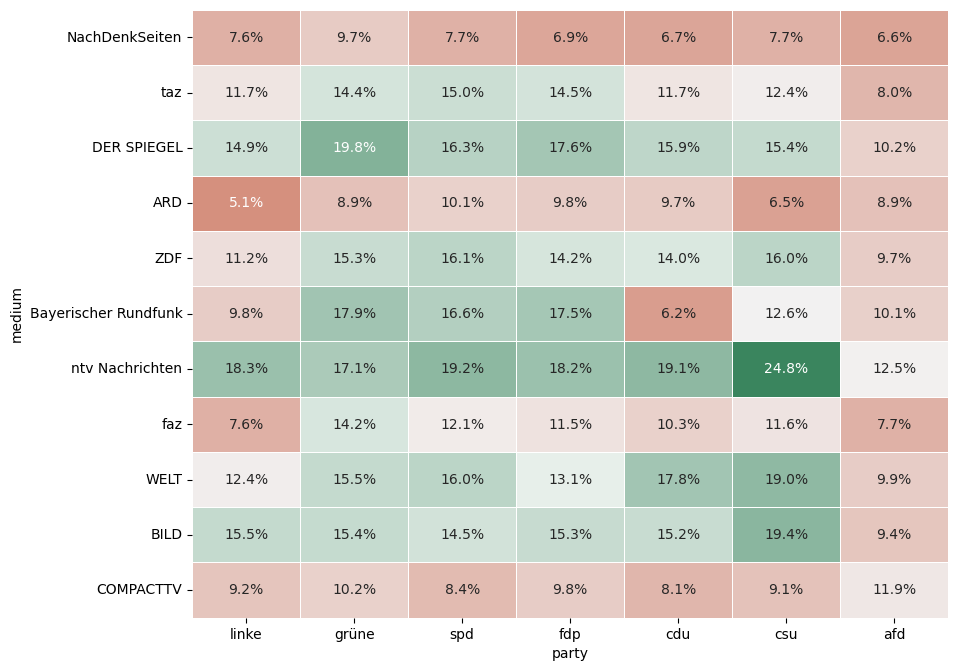

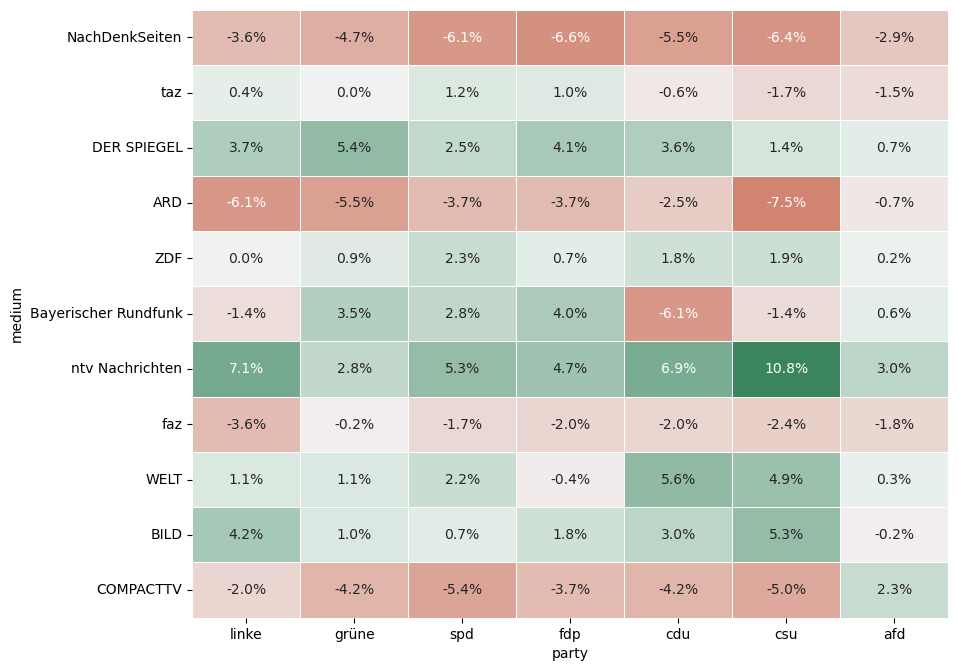

In [7]:
party_positive_classifications_standardized, party_positive_classifications_deviations = sentiment_analysis_pipeline(party_positive_classifications, party_mentions)

In [8]:
f_saveplot_sentiment_short(df=party_positive_classifications_standardized, title='Positive Sentiment Classification Proportions', path='../results/englisch/sentiment_positiv_gekuerzt.pdf')
f_saveplot_sentiment_short(df=party_positive_classifications_deviations, title='Positive Sentiment Classification Proportions (zero mean)', path='../results/englisch/sentiment_positiv_gekuerzt_mittelwertfrei.pdf', n_rows_in_title=1)

/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_93911/548886920.py:47: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))
/Users/hs/miniforge3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.draw()
/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_93911/548886920.py:47: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))
/Users/hs/miniforge3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.draw()


In [9]:
party_neutral_classifications_standardized, party_neutral_classifications_deviations = sentiment_analysis_pipeline(party_neutral_classifications, party_mentions)



Pivoted DF:
party                 afd   cdu   csu   fdp  grüne  linke   spd  trump
medium                                                                
ARD                    77   142    54   150     87     17   176     48
BILD                  477  2411   807  1250    578    199  1778   2406
Bayerischer Rundfunk   31    32   139    34     44     27    79     92
COMPACTTV             643   279   100   241    147    104   246    154
DER SPIEGEL           339   535   291   353    224     86   659    418
NachDenkSeiten        226   392   146   153     83    196   692    324
WELT                  669  3819  1487  2638   1269    464  3137   2620
ZDF                   876  1889   624  1313    633    411  1673   1118
faz                   277   656   179   342    162     98   583   1045
ntv Nachrichten       335   830   411   443    268    166   706    400
taz                   139   251    46   125    165    120   214     56


Sorted DF:
party                 linke  grüne   spd   fdp   c

/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_93911/548886920.py:22: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))
/Users/hs/miniforge3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.draw()
/Users/hs/miniforge3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  func(*args, **kwargs)


In [10]:
f_saveplot_sentiment_short(df=party_neutral_classifications_standardized, title='Neutral Sentiment Classification Proportions', path='../results/englisch/sentiment_neutral_gekuerzt.pdf')
f_saveplot_sentiment_short(df=party_neutral_classifications_deviations, title='Neutral Sentiment Classification Proportions (zero mean)', path='../results/englisch/sentiment_neutral_gekuerzt_mittelwertfrei.pdf', n_rows_in_title=1)

/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_93911/548886920.py:47: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))
/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_93911/548886920.py:47: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))
/Users/hs/miniforge3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.draw()


In [11]:
party_negative_classifications_standardized, party_negative_classifications_deviations = sentiment_analysis_pipeline(party_negative_classifications, party_mentions)

/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_93911/548886920.py:22: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))
/Users/hs/miniforge3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.draw()




Pivoted DF:
party                  afd   cdu   csu   fdp  grüne  linke   spd  trump
medium                                                                 
ARD                    190   267    75   235    158     39   340     56
BILD                   781  2750   918  1734    862    266  2998   1058
Bayerischer Rundfunk    58    44   173    46     57     28   142     48
COMPACTTV              822   519   151   384    240    142   415    113
DER SPIEGEL            460   725   355   488    251    119   961    229
NachDenkSeiten         308   372   143   173    104    230   740    143
WELT                   865  3729  1447  3385   1609    614  4466   1175
ZDF                   1390  2435   700  2066    960    578  2536    621
faz                    370   534   133   365    165     96   627    431
ntv Nachrichten        392   866   333   518    336    133   944    182
taz                    238   378    53   235    269    168   371     53


Sorted DF:
party                 linke  grüne   

/Users/hs/miniforge3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  func(*args, **kwargs)


In [12]:
f_saveplot_sentiment_short(df=party_negative_classifications_standardized, title='Negative Sentiment Classification Proportions', path='../results/englisch/sentiment_negativ_gekuerzt.pdf')
f_saveplot_sentiment_short(df=party_negative_classifications_deviations, title='Negative Sentiment Classification Proportions (zero mean)', path='../results/englisch/sentiment_negativ_gekuerzt_mittelwertfrei.pdf', n_rows_in_title=1)

/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_93911/548886920.py:47: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))
/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_93911/548886920.py:47: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))
/Users/hs/miniforge3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.draw()


In [13]:
linke_sample = party_negative_classifications[party_negative_classifications['party'] == 'linke'].sample(n=50)

In [14]:
#plausability test
party_positive_classifications_standardized+party_neutral_classifications_standardized+party_negative_classifications_standardized

party,linke,grüne,spd,fdp,cdu,csu,afd
medium,,,,,,,
NachDenkSeiten,1.0,1.0,1.0,1.0,1.0,1.0,1.0
taz,1.0,1.0,1.0,1.0,1.0,1.0,1.0
DER SPIEGEL,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ARD,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ZDF,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Bayerischer Rundfunk,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ntv Nachrichten,1.0,1.0,1.0,1.0,1.0,1.0,1.0
faz,1.0,1.0,1.0,1.0,1.0,1.0,1.0
WELT,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [15]:
politician_positive_classifications_standardized, politician_positive_classifications_deviations = sentiment_analysis_pipeline(politician_positive_classifications, politician_mentions)

/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_93911/548886920.py:22: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))
/Users/hs/miniforge3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.draw()




Pivoted DF:
party                 afd  cdu  csu  fdp  grüne  linke  spd
medium                                                     
ARD                     3   26    1    3     29     10   51
BILD                    7  481   49  207    217     21  527
Bayerischer Rundfunk    4    4    4    0      4      1    0
COMPACTTV               6    2    1    2      8      9    4
DER SPIEGEL            11   51    6   32     51     10   88
NachDenkSeiten          1    8    0    1      8      6   22
WELT                   15  684   98  287    456     59  870
ZDF                    17  271   27   84    181     28  362
faz                     1   43    6   14     41      4   50
ntv Nachrichten         8  164   18   46     67     15  145
taz                     1    6    4    3     16      3   20


Sorted DF:
party                 linke  grüne  spd  fdp  cdu  csu  afd
medium                                                     
NachDenkSeiten            6      8   22    1    8    0    1
taz          

/Users/hs/miniforge3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  func(*args, **kwargs)


In [16]:
politician_neutral_classifications_standardized, politician_neutral_classifications_deviations = sentiment_analysis_pipeline(politician_neutral_classifications, politician_mentions)



Pivoted DF:
party                 afd   cdu  csu   fdp  grüne  linke   spd
medium                                                        
ARD                    15   189   15    70    104     15   250
BILD                   29  4016  198   899   1259     73  3496
Bayerischer Rundfunk   11    22   22     8     26      7    24
COMPACTTV              47    57    1    16     49     49    81
DER SPIEGEL            34   342   43   136    224     39   333
NachDenkSeiten          9   162   19    20     85    119   233
WELT                   56  3802  317  1026   3302    216  6350
ZDF                    50  2261  109   448    867    128  2101
faz                     7   286   58    58    197     29   380
ntv Nachrichten        41   930   53   144    277     23   768
taz                     5    61    5    26     99     37    68


Sorted DF:
party                 linke  grüne   spd   fdp   cdu  csu  afd
medium                                                        
NachDenkSeiten          119 

/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_93911/548886920.py:22: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))
/Users/hs/miniforge3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.draw()
/Users/hs/miniforge3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  func(*args, **kwargs)


In [17]:
politician_negative_classifications_standardized, politician_negative_classifications_deviations = sentiment_analysis_pipeline(politician_negative_classifications, politician_mentions)



Pivoted DF:
party                 afd   cdu  csu  fdp  grüne  linke   spd
medium                                                       
ARD                     3    81    6   22     50      8   136
BILD                   13  1377   55  303    409     27  1314
Bayerischer Rundfunk    0     4    6    0     11      0    12
COMPACTTV               9    33    0    9     31     28    38
DER SPIEGEL            11   115   21   33     72      9   105
NachDenkSeiten          3    50    6    7     47     43   106
WELT                   18  1300   94  410   1055     68  2398
ZDF                    23   863   48  163    384     66   784
faz                    14   112   21   25     69      7   139
ntv Nachrichten         6   206   15   29     69     15   199
taz                     1    26    4   11     24     15    35


Sorted DF:
party                 linke  grüne   spd  fdp   cdu  csu  afd
medium                                                       
NachDenkSeiten           43     47   106   

/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_93911/548886920.py:22: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))
/Users/hs/miniforge3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.draw()
/Users/hs/miniforge3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  func(*args, **kwargs)


In [18]:
politician_significant_mentions = politician_classifications.search_term.value_counts()[politician_classifications.search_term.value_counts()>100]

In [19]:
politician_positive_proportions = politician_positive_classifications.search_term.value_counts()/politician_significant_mentions

In [20]:
politician_positive_proportions.dropna().sort_values(ascending=False)

mario czaja                  0.313187
alexander dobrindt           0.221687
anja karliczek               0.219512
thorsten frei                0.215517
alexander graf lambsdorff    0.213873
michael roth                 0.213333
claudia roth                 0.192857
volker wissing               0.180982
stephan mayer                0.174157
lars klingbeil               0.170877
jürgen trittin               0.168831
gregor gysi                  0.163522
kevin kühnert                0.157658
dietmar bartsch              0.156069
michael müller               0.154971
marco buschmann              0.145833
christian lindner            0.139571
omid nouripour               0.133080
ralf stegner                 0.132353
alexander gauland            0.129808
wolfgang kubicki             0.129353
heiko maas                   0.126526
julia klöckner               0.124498
sahra wagenknecht            0.120988
hubertus heil                0.120354
svenja schulze               0.117347
helge braun 

In [21]:
politician_negative_proportions = politician_negative_classifications.search_term.value_counts()/politician_significant_mentions

In [22]:
politician_negative_proportions.dropna().sort_values(ascending=False)

rolf mützenich               0.403361
anton hofreiter              0.366599
marco buschmann              0.312500
andreas scheuer              0.303371
lars klingbeil               0.300149
sahra wagenknecht            0.298765
heiko maas                   0.298557
saskia esken                 0.287986
armin laschet                0.283066
lisa paus                    0.275862
mario czaja                  0.274725
claudia roth                 0.271429
helge braun                  0.266537
jürgen trittin               0.264069
jens spahn                   0.262914
alexander gauland            0.259615
cem özdemir                  0.254777
kevin kühnert                0.254505
annalena baerbock            0.249257
karl lauterbach              0.246168
olaf scholz                  0.242184
dietmar bartsch              0.231214
bärbel bas                   0.227586
christian lindner            0.226901
wolfgang schäuble            0.217391
omid nouripour               0.216730
wolfgang kub

In [23]:
def sample_party_mentions(medium, sentiment, n):
    return party_classifications.loc[(party_classifications.medium == medium) & party_classifications[sentiment]].sample(n=n)

def sample_politician_mentions(medium, sentiment, n):
    return politician_classifications.loc[(politician_classifications.medium == medium) & politician_classifications[sentiment]].sample(n=n)

In [24]:
sample_party_mentions(medium='ntv Nachrichten', sentiment='positive', n=6)

,medium,id,title,minute,date,search_term,extracted_string,party,positive,neutral,negative,score
56361,ntv Nachrichten,0GKV2DO21ns,LIVE: Merkel zu den Ausschreitungen in Washington,6,2021-01-07,cdu,dieses jahr werfen und wir sind uns einig das ...,cdu,True,False,False,0.615565
57677,ntv Nachrichten,KTQ1hmhgzKA,"Live: Hamburg wählt! Zahlen, Fakten, Hintergrü...",11,2020-02-23,spd,hätte demnach weiter eine mehrheit und peter t...,spd,True,False,False,0.457911
59040,ntv Nachrichten,lVB8xdWe_TI,Live: Landtagswahlen 2019 in Sachsen und Brand...,7,2019-09-01,afd,der flüchtlingskrise in deutschland migration ...,afd,True,False,False,0.469404
59481,ntv Nachrichten,ZgE4kNKgmfM,Live: G7-Gipfel in Biarritz - Macron und Trump...,33,2019-08-26,trump,auch minister ebene miteinander sprechen ich h...,trump,True,False,False,0.778685
61255,ntv Nachrichten,y0eBrhEyUog,"Interview 2: „Wieso Sie, Christian Lindner?“",7,2017-09-21,fdp,frage formen des bildungsföderalismus gemeinsa...,fdp,True,False,False,0.660054
52507,ntv Nachrichten,CNMjCJx-MXg,NRW-Wahl LIVE: Pressekonferenz der Wahlsiegeri...,14,2022-05-16,cdu,gehen und insofern ein guter tag nicht nur für...,cdu,True,False,False,0.982704


In [25]:
sample_politician_mentions(medium='taz', sentiment='negative', n=8)

,medium,id,title,minute,date,search_term,extracted_string,party,positive,neutral,negative,score
32173,taz,V9emA-SFOns,Wie tickt Lindner? Christian Lindner auf dem t...,2,2018-04-23,christian lindner,grünen und diese ungleiche konstellation kam i...,fdp,False,False,True,0.790173
31923,taz,VD8PI_s2CQ8,Geht Klimaschutz und Umverteilung? Katja Kippi...,74,2021-09-06,olaf scholz,pro tonne weil das gar nichts bewirkt das war ...,spd,False,False,True,0.916983
31859,taz,mZr5RXsPHxc,"Wer liegt vorne, wer am Boden? - taz talk Wahl...",134,2021-09-26,robert habeck,wahlkampf als nummer eins das ist leider manch...,grüne,False,False,True,0.696584
31755,taz,VNJ1grD1Dy8,Yasmine M'Barek: Radikale Kompromisse - taz Talk,44,2022-04-06,robert habeck,weil man warum das nichts zu tun und auch ein ...,grüne,False,False,True,0.587051
32089,taz,UjIjf0LLPhM,taz Studio [Buchmesse Leipzig 2019] „Alles kön...,26,2019-03-24,christian lindner,was uns von anderen trends selbst einem jetzt ...,fdp,False,False,True,0.737170
31797,taz,v-OIsvD7sE0,Kristina Schröder: FreiSinnig - im Gespräch mi...,23,2021-11-02,armin laschet,die cdu im januar den nachfolger oder die nach...,cdu,False,False,True,0.632197
31828,taz,mZr5RXsPHxc,"Wer liegt vorne, wer am Boden? - taz talk Wahl...",17,2021-09-26,annalena baerbock,überholt hat ist es am ende eigentlich auch eg...,grüne,False,False,True,0.543498
32038,taz,LINCH66OqWQ,taz Talk #40 - Laid Back: Gegen das Müssen,25,2020-09-11,saskia esken,die wir veröffentlicht haben deswegen ja schon...,spd,False,False,True,0.646782


In [32]:
party_negative_classifications_standardized.std()

party
linke    0.070370
grüne    0.050584
spd      0.044363
fdp      0.040234
cdu      0.070258
csu      0.064248
afd      0.049411
dtype: float64

In [31]:
party_neutral_classifications_standardized

party,linke,grüne,spd,fdp,cdu,csu,afd
medium,,,,,,,
NachDenkSeiten,0.425163,0.400966,0.446164,0.437143,0.478632,0.466454,0.395105
taz,0.368098,0.325444,0.311047,0.296912,0.352528,0.407080,0.339024
DER SPIEGEL,0.356846,0.378378,0.340393,0.345739,0.357143,0.380890,0.380899
ARD,0.288136,0.323420,0.306620,0.351288,0.313466,0.391304,0.262799
ZDF,0.368941,0.336702,0.333533,0.333418,0.375547,0.395939,0.349004
Bayerischer Rundfunk,0.442623,0.357724,0.298113,0.350515,0.395062,0.389356,0.313131
ntv Nachrichten,0.453552,0.367627,0.345909,0.377021,0.395804,0.415152,0.403129
faz,0.466667,0.425197,0.423384,0.428035,0.494721,0.507082,0.395150
WELT,0.377236,0.372797,0.346668,0.380609,0.415832,0.410660,0.393067
